# Rough Data Cuts
other shit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot as up
import seaborn as sns

FNAME = "/disk/moose/lhcb/djdt/Lb2L1520mueTuples/realData/2016MD/halfSampleOct2021/blindedTriggeredL1520Selec-collision-firstHalf2016MD-pKmue_Full.root"
SUFFIX = ":DTT1520me/DecayTree"

In [4]:
def get_particles_data(particles, features, fName, suffix):
    """
    Get the features specified in features from the ROOT tuples. Can be specified
    for multiple particles. 

    Parameters:
        particles (list): A list of particles using the ROOT naming convention
        to be interrorgated. For example ['L1', 'K']

    Returns: 
        data (dict): A dictionary of pd.DataFrame for each particle with columns
        labelled according to FEATURES. Keys are particle tuple names.
    """

    data = {}
    for particle in particles:
        fts = [particle + "_" + feature for feature in features]
        with up.open(fName + suffix) as f:
            df = f.arrays(fts, library="pd")
            df.drop_duplicates(keep='first', inplace=True)
            df.columns = features
            data[particle] = df
    return data

In [7]:
with up.open(FNAME + SUFFIX) as f:
    print(f.keys())

['Lb_MINIP', 'Lb_MINIPCHI2', 'Lb_MINIPNEXTBEST', 'Lb_MINIPCHI2NEXTBEST', 'Lb_ENDVERTEX_X', 'Lb_ENDVERTEX_Y', 'Lb_ENDVERTEX_Z', 'Lb_ENDVERTEX_XERR', 'Lb_ENDVERTEX_YERR', 'Lb_ENDVERTEX_ZERR', 'Lb_ENDVERTEX_CHI2', 'Lb_ENDVERTEX_NDOF', 'Lb_ENDVERTEX_COV_', 'Lb_OWNPV_X', 'Lb_OWNPV_Y', 'Lb_OWNPV_Z', 'Lb_OWNPV_XERR', 'Lb_OWNPV_YERR', 'Lb_OWNPV_ZERR', 'Lb_OWNPV_CHI2', 'Lb_OWNPV_NDOF', 'Lb_OWNPV_COV_', 'Lb_IP_OWNPV', 'Lb_IPCHI2_OWNPV', 'Lb_FD_OWNPV', 'Lb_FDCHI2_OWNPV', 'Lb_DIRA_OWNPV', 'Lb_TOPPV_X', 'Lb_TOPPV_Y', 'Lb_TOPPV_Z', 'Lb_TOPPV_XERR', 'Lb_TOPPV_YERR', 'Lb_TOPPV_ZERR', 'Lb_TOPPV_CHI2', 'Lb_TOPPV_NDOF', 'Lb_TOPPV_COV_', 'Lb_IP_TOPPV', 'Lb_IPCHI2_TOPPV', 'Lb_FD_TOPPV', 'Lb_FDCHI2_TOPPV', 'Lb_DIRA_TOPPV', 'Lb_HOP', 'Lb_HOP_MASS', 'Lb_HOP_ELECTRON_MASS', 'Lb_P', 'Lb_PT', 'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ', 'Lb_REFPX', 'Lb_REFPY', 'Lb_REFPZ', 'Lb_MM', 'Lb_MMERR', 'Lb_M', 'Lb_ID', 'Lb_TAU', 'Lb_TAUERR', 'Lb_TAUCHI2', 'Lb_DTF_PV_JPs_M012', 'Lb_DTF_PV_JPs_M013', 'Lb_JPs_1ST_TrkISOBDT', 'Lb_JPs_

In [10]:
with up.open(FNAME + SUFFIX) as f:
    df = f.arrays(['totCandidates','nCandidate'], library="pd")
    df['tot'] = df['totCandidates'] > df['nCandidate']
df.head()

,totCandidates,nCandidate,tot
0,2,1,True
1,2,1,True
2,2,0,True
3,2,0,True
4,2,1,True


In [11]:
df['tot'].unique()

array([ True])

In [5]:
features = ['nCandidate', 'totCandidate']
particles = ['L2', 'L1', 'K', 'p']

df = get_particles_data(particles, features, FNAME, SUFFIX)

KeyInFileError: not found: 'L2_nCandidate'
in file /disk/moose/lhcb/djdt/Lb2L1520mueTuples/realData/2016MD/halfSampleOct2021/blindedTriggeredL1520Selec-collision-firstHalf2016MD-pKmue_Full.root
in object /DTT1520me/DecayTree;1

In [5]:
kaons = df['K']

<AxesSubplot:xlabel='ProbNNp', ylabel='Count'>

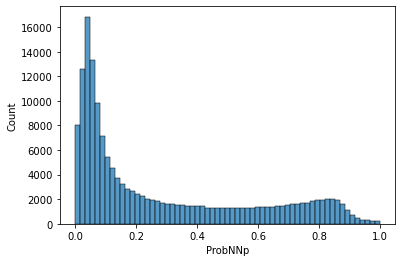

In [6]:
sns.histplot(kaons['ProbNNp'])